<a href="https://colab.research.google.com/github/Sahilmandalwar/campusx_machine_learning_code/blob/main/ML_016_5KeyPointsRidgeRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from sklearn.datasets import load_diabetes

In [2]:
df = load_diabetes()

In [3]:
X,y = df['data'], df['target']

In [4]:
from sklearn.linear_model import Ridge

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.2)

In [6]:
import matplotlib.pyplot as plt

In [7]:
from sklearn.metrics import r2_score

**1. Increasing alpha will lead all the weight to tend zero, but never become zero**

In [8]:
coeffs_ = []
intercepts_ = []
accuracys = []

In [9]:
def drawCurve(coef,accuracy):

  plt.bar(x=df.feature_names,height=coef)
  plt.xlabel('labels')
  plt.ylabel('values')
  plt.title(f'accuracy: {accuracy}')


In [10]:
def concludeRidge(alpha_values):
  for alpha in alpha_values:
    reg = Ridge(alpha=alpha)
    reg.fit(X_train,y_train)
    coeffs_.append(reg.coef_.tolist())
    accuracys.append(r2_score(y_test,reg.predict(X_test)))

  plt.figure(figsize=(20,20))
  for i in range(len(accuracys)):
    plt.subplot(3,3,i+1)
    drawCurve(coeffs_[i],accuracys[i])
  plt.show()

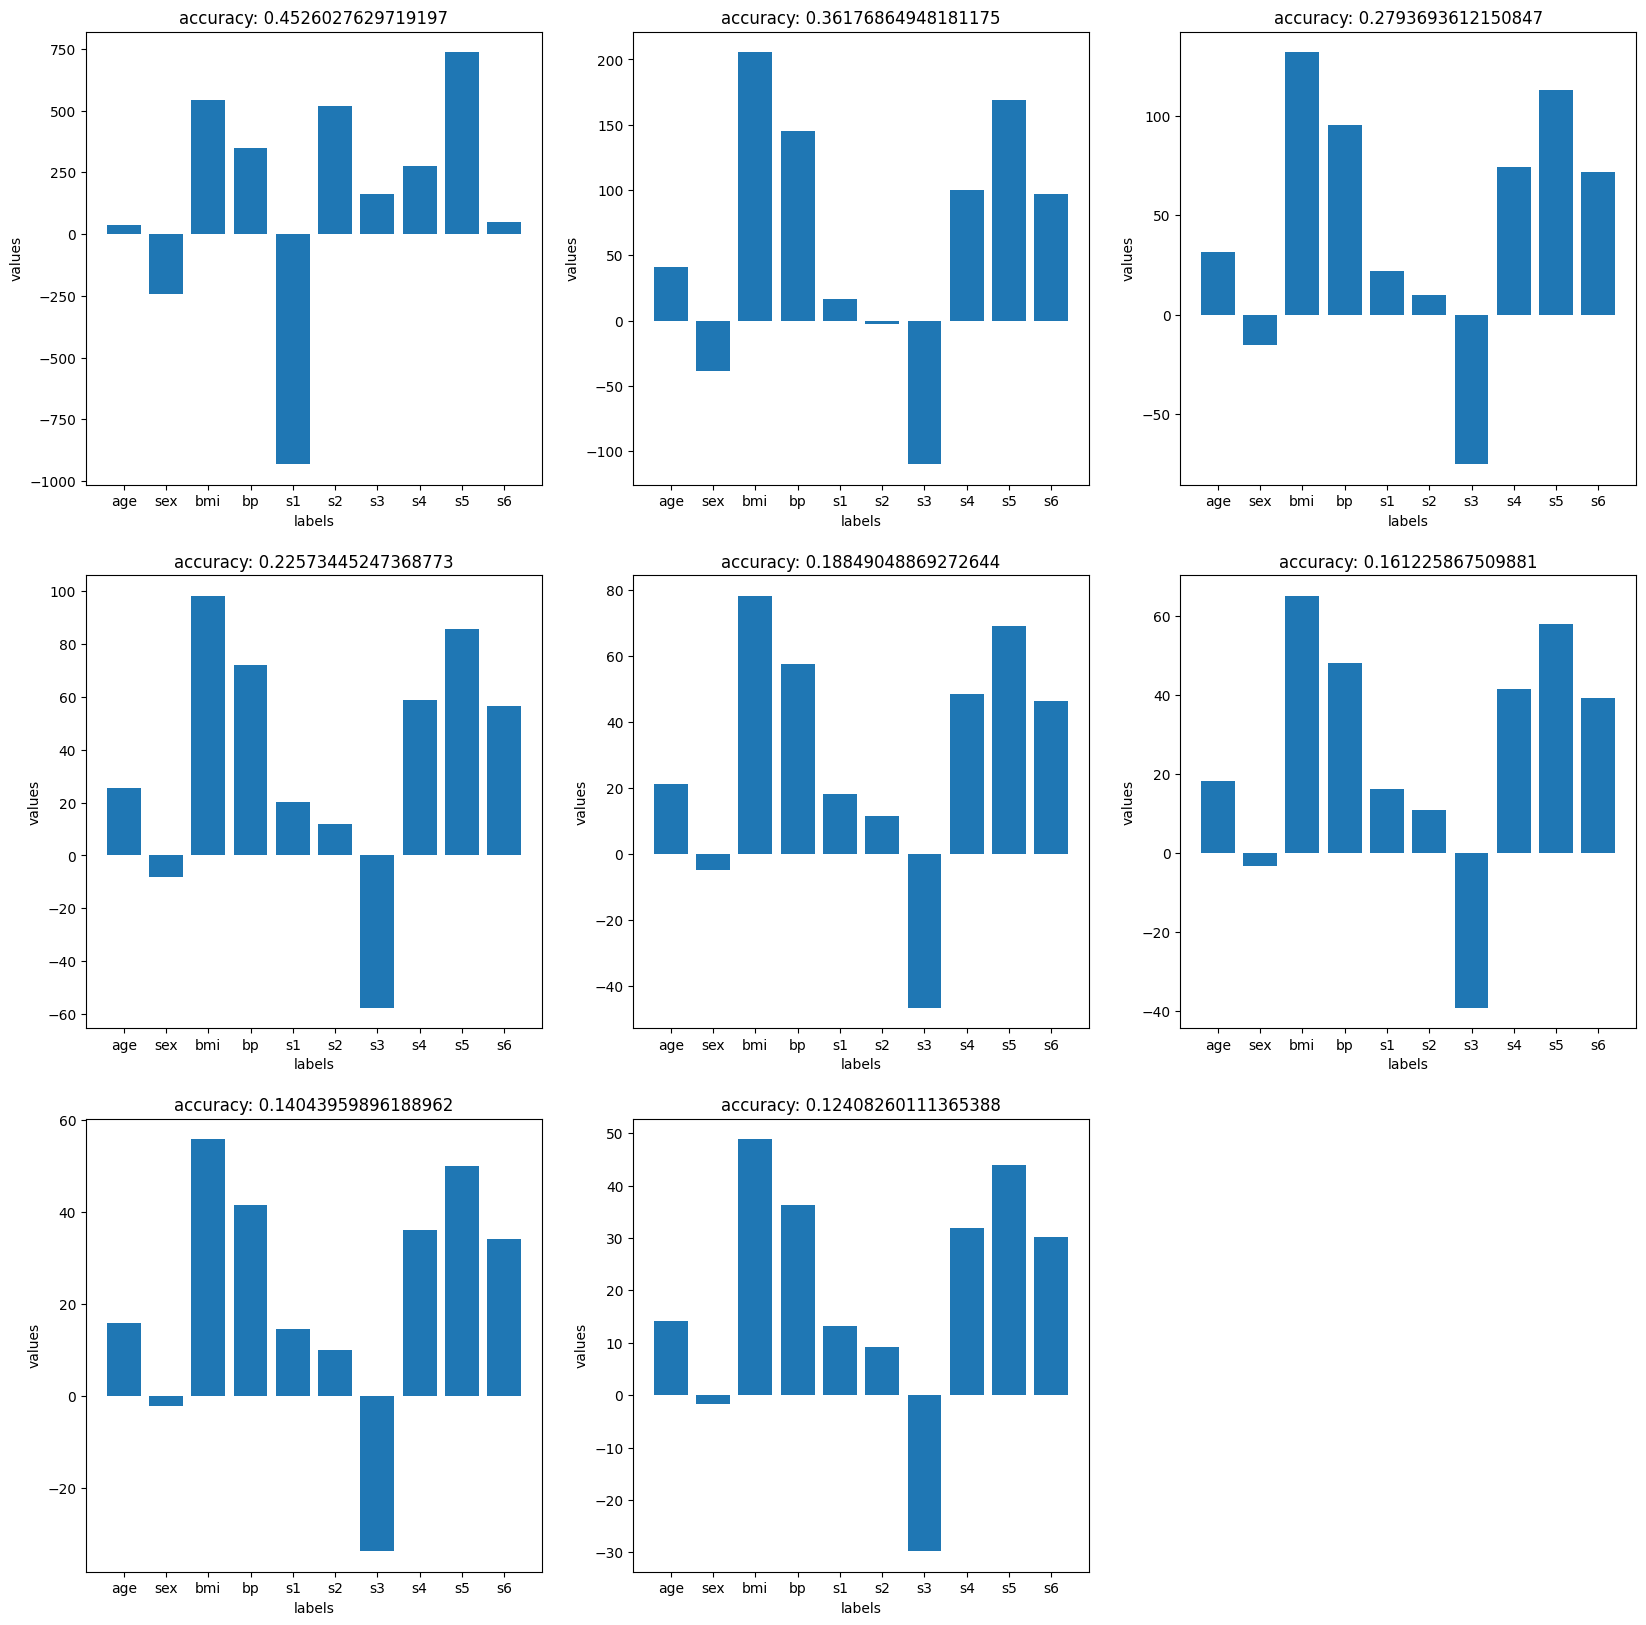

In [11]:
alpha_values = [0,2,4,6,8,10,12,14]
concludeRidge(alpha_values)

**2. Higher Values are impacted More**

In [12]:
import pandas as pd
import numpy as np

In [13]:
coef_df = pd.DataFrame(coeffs_,columns=df.feature_names)


In [14]:
coef_df['alpha'] = alpha_values
coef_df.set_index('alpha',inplace=True)

In [15]:
coef_df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0,37.904021,-241.964362,542.428759,347.703844,-931.488846,518.062277,163.419983,275.317902,736.198859,48.670657
2,40.771812,-38.422827,205.442914,145.020708,16.776535,-2.677202,-109.941589,99.649637,168.903304,96.704949
4,31.701906,-15.376311,132.136172,95.745080,21.839172,10.044788,-75.318882,74.123826,113.075596,71.618743
6,25.527343,-8.128474,98.146685,71.921323,20.342213,11.901592,-57.545637,58.762264,85.657802,56.343345
8,21.286551,-4.945748,78.252926,57.704703,18.193421,11.623756,-46.624064,48.616286,69.095040,46.359040
10,18.229623,-3.277536,65.128417,48.219668,16.238315,10.861055,-39.208913,41.438568,57.950124,39.359401
12,15.930860,-2.300110,55.800490,41.428767,14.583724,10.032598,-33.837910,36.099634,49.921701,34.188653
14,14.142539,-1.681570,48.822338,36.322201,13.200414,9.255399,-29.765459,31.975645,43.856744,30.215519


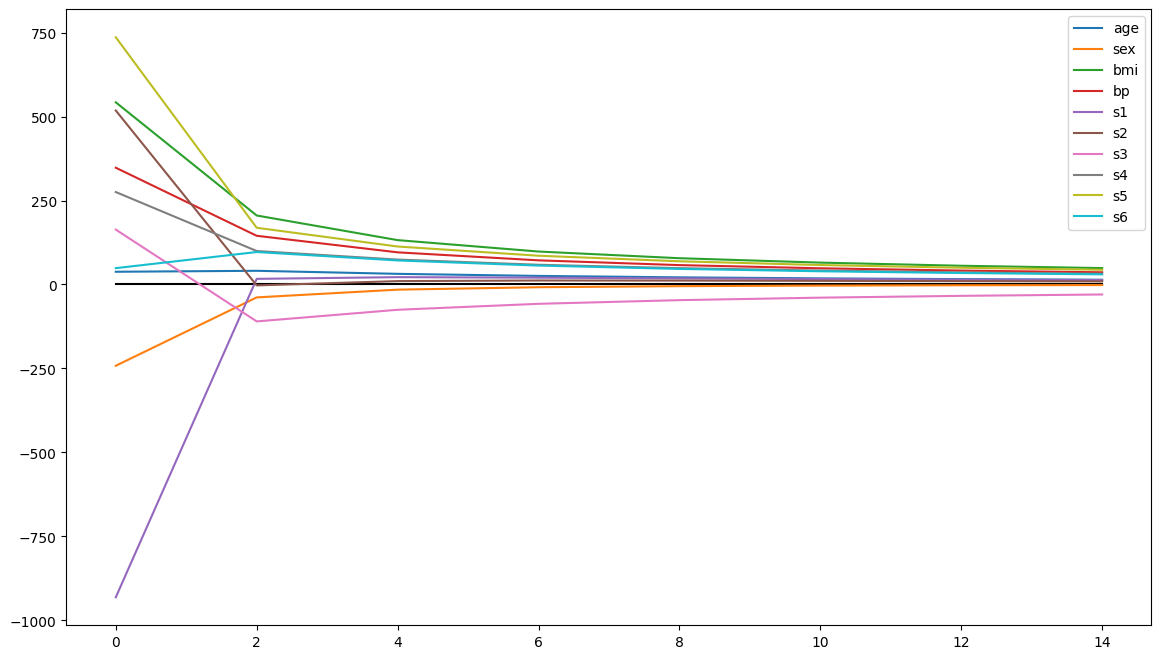

In [16]:
plt.figure(figsize=(14,8))
plt.plot(range(0,15),np.zeros(15),color='black')
for column in coef_df:
  plt.plot(coef_df[column],label=column)
plt.legend()
plt.show()

**3. Bias Variance Tradeoff**




In [17]:
# Create Sample Data Point
m = 100
x = 5*np.random.rand(m,1) - 2
y = 0.7*x**2 - 2 * x  + 3 + np.random.rand(m,1)

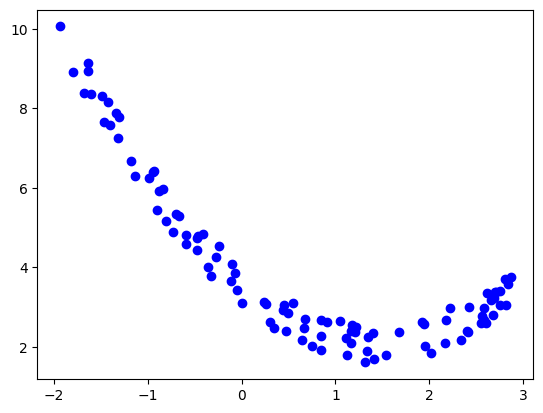

In [18]:
plt.scatter(x,y,color='blue')
plt.show()

In [19]:
from sklearn.preprocessing import PolynomialFeatures

In [20]:
X_train,X_test,y_train,y_test = train_test_split(x.reshape((100,1)),y.reshape(100),random_state=42,test_size=0.2)

In [21]:
poly = PolynomialFeatures(degree=15)
X_train_transformed = poly.fit_transform(X_train)
X_test_transformed = poly.transform(X_test)

In [22]:
from sklearn.linear_model import Ridge

In [23]:
from mlxtend.evaluate import bias_variance_decomp  # calculate bias and variance and loss using loss function

In [24]:
alphas = np.linspace(0,30,100)
loss = []
bias = []
variance = []
for i in alphas:
  reg = Ridge(alpha = i)
  expected_loss, biased, varianced = bias_variance_decomp(reg,X_train_transformed,y_train,X_test_transformed,y_test,loss='mse',random_seed=42)
  loss.append(expected_loss)
  bias.append(biased)
  variance.append(varianced)

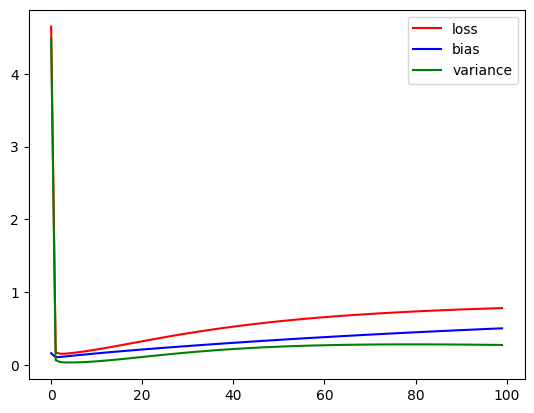

In [25]:
plt.plot(loss,color='red',label='loss')
plt.plot(bias,color='blue',label='bias')
plt.plot(variance,color='green',label='variance')
plt.legend()

plt.show()

**4. Impact on the loss function**

In [26]:
from sklearn.datasets import make_regression

In [27]:
X,y = make_regression(n_features=1,n_samples=100,n_informative=1,n_targets=1,noise=20,random_state=13)

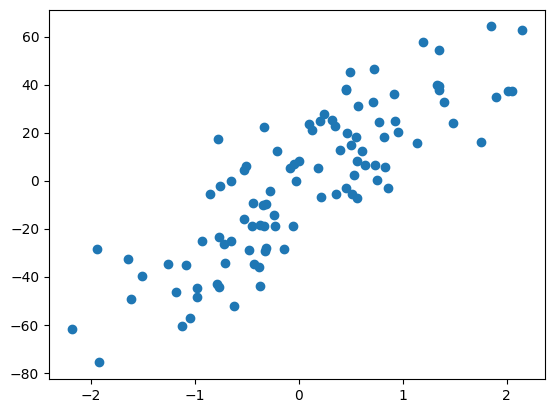

In [28]:
plt.scatter(X,y)

In [29]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [30]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)

LinearRegression()

In [31]:
lr.coef_, lr.intercept_

(array([27.82809103]), np.float64(-2.29474455867698))

In [32]:
def cal_loss(m,alpha):
  return np.sum((y - (m*X.ravel() + lr.intercept_))**2 + alpha*m*m)

In [33]:
def predict(m):
  return m*X +  lr.intercept_

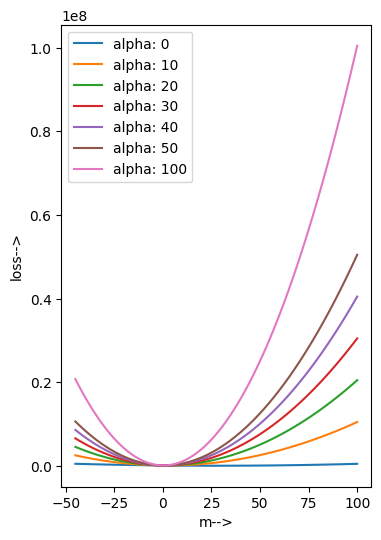

In [37]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
alpha = [0,10,20,30,40,50,100]
for j in alpha:
  loss = []
  for i in range(m.shape[0]):
    loss.append(cal_loss(m[i],j))
  plt.plot(m,loss,label=f'alpha: {j}')
plt.legend()
plt.xlabel("m-->")
plt.ylabel('loss-->')
plt.show()

**5. Why called Ridge Regression?**

since the minimum value lie on pheriphery or ridge of circle when we consider alpha part in loss function of ridge regression.